<a href="https://colab.research.google.com/github/Pankaj-2003/Assignment/blob/main/EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Assessment-2-Associate-DS(in).csv')


In [ ]:
df

,weekend_date,channel,brand,category,sub_category,SerailNum,quantity
0,4/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,56
1,11/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,122
2,18/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,102
3,25/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2/7/2022,Channel1,B1,Cat2,Sub-Cat2,1,97
...,...,...,...,...,...,...,...
595,24/08/2024,Channel2,B2,Cat3,Sub-Cat3,2,250
596,24/08/2024,Channel2,B2,Cat3,Sub-Cat3,4,775
597,31/08/2024,Channel2,B1,Cat3,Sub-Cat4,4,1189
598,31/08/2024,Channel2,B2,Cat3,Sub-Cat3,2,180


In [ ]:
df.shape

(600, 7)

In [ ]:
# fixing the column name typo
df = df.rename(columns={'SerailNum': 'SerialNum'})


In [ ]:
print(df.dtypes)

weekend_date    object
channel         object
brand           object
category        object
sub_category    object
SerialNum        int64
quantity         int64
dtype: object


In [ ]:
# datatype fixing
df['weekend_date'] = df['weekend_date'].astype(str).str.split(' ').str[0]
df['weekend_date'] = pd.to_datetime(df['weekend_date'], dayfirst=True)

In [ ]:
df

,weekend_date,channel,brand,category,sub_category,SerialNum,quantity
0,2022-06-04,Channel1,B1,Cat2,Sub-Cat2,1,56
1,2022-06-11,Channel1,B1,Cat2,Sub-Cat2,1,122
2,2022-06-18,Channel1,B1,Cat2,Sub-Cat2,1,102
3,2022-06-25,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2022-07-02,Channel1,B1,Cat2,Sub-Cat2,1,97
...,...,...,...,...,...,...,...
595,2024-08-24,Channel2,B2,Cat3,Sub-Cat3,2,250
596,2024-08-24,Channel2,B2,Cat3,Sub-Cat3,4,775
597,2024-08-31,Channel2,B1,Cat3,Sub-Cat4,4,1189
598,2024-08-31,Channel2,B2,Cat3,Sub-Cat3,2,180


In [ ]:
# missing values
df.isnull().sum()


,0
weekend_date,0
channel,0
brand,0
category,0
sub_category,0
SerialNum,0
quantity,0


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['quantity'].describe()
# right skewness can be seen as median<mean

,quantity
count,600.000000
mean,547.330000
std,925.749108
min,1.000000
25%,121.000000
50%,244.500000
75%,624.500000
max,8051.000000


<Axes: xlabel='quantity', ylabel='Count'>

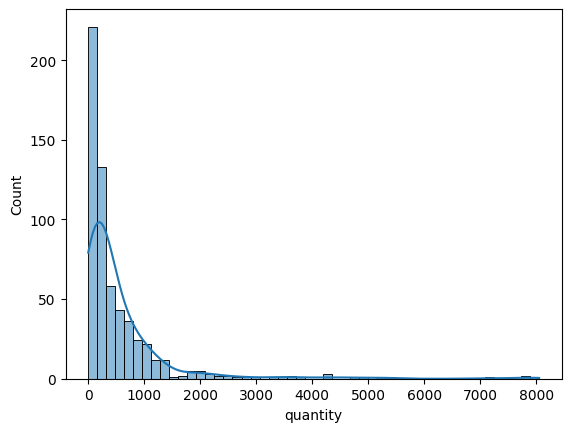

In [ ]:
sns.histplot(df['quantity'], bins=50, kde=True)
#  classic right skewness can be seen

In [ ]:
for col in [col for col in df.columns if df[col].dtype == "O"]:
    print(f"{col}: {df[col].nunique()} unique values")

channel: 3 unique values
brand: 2 unique values
category: 3 unique values
sub_category: 4 unique values


In [ ]:
df

,weekend_date,channel,brand,category,sub_category,SerialNum,quantity
0,2022-06-04,Channel1,B1,Cat2,Sub-Cat2,1,56
1,2022-06-11,Channel1,B1,Cat2,Sub-Cat2,1,122
2,2022-06-18,Channel1,B1,Cat2,Sub-Cat2,1,102
3,2022-06-25,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2022-07-02,Channel1,B1,Cat2,Sub-Cat2,1,97
...,...,...,...,...,...,...,...
595,2024-08-24,Channel2,B2,Cat3,Sub-Cat3,2,250
596,2024-08-24,Channel2,B2,Cat3,Sub-Cat3,4,775
597,2024-08-31,Channel2,B1,Cat3,Sub-Cat4,4,1189
598,2024-08-31,Channel2,B2,Cat3,Sub-Cat3,2,180


In [ ]:
# checking if data is sorted
is_sorted = df['weekend_date'].is_monotonic_increasing
print("Data is sorted? -->", is_sorted)


Data is sorted? --> False


In [ ]:
# sorting
df = df.sort_values(['SerialNum', 'weekend_date'])


In [ ]:
print(f"Date range: {df['weekend_date'].min()} to {df['weekend_date'].max()}")


Date range: 2022-05-28 00:00:00 to 2024-08-31 00:00:00


In [ ]:
for serial_num in df['SerialNum'].unique():
    serial_data = df[df['SerialNum'] == serial_num].copy()

    # checking if weekly intervals are consistent
    date_diffs = serial_data['weekend_date'].diff().dt.days
    # 7 days as the data is weekly
    expected_interval = 7

    # finding gaps i.e more then 7 days difference
    gaps = date_diffs[date_diffs > expected_interval]
    if len(gaps) > 0:
        print(f"  SerialNum {serial_num}: {len(gaps)} gaps")

  SerialNum 3: 2 gaps
  SerialNum 5: 1 gaps


# **Visualization**


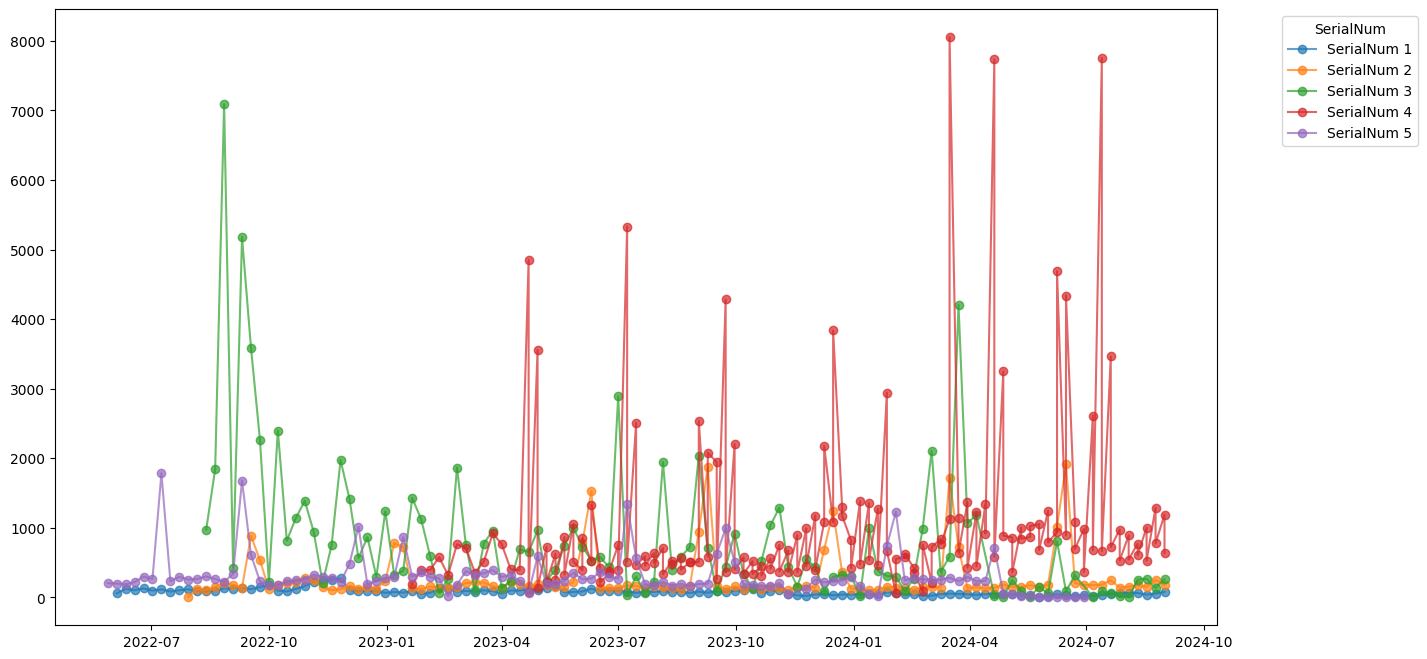

In [ ]:
fig_width = 15
fig_height = 8

# overall time series plot
plt.figure(figsize=(fig_width, fig_height))
for serial_num in df['SerialNum'].unique():
    serial_data = df[df['SerialNum'] == serial_num]
    plt.plot(serial_data['weekend_date'], serial_data['quantity'],
             label=f'SerialNum {serial_num}', marker='o', alpha=0.7)

plt.legend(title="SerialNum", bbox_to_anchor=(1.05, 1), loc='upper left')



### outliers can be seen

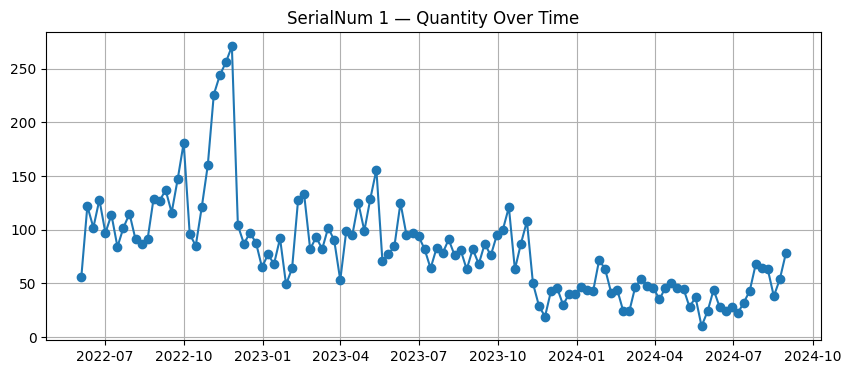

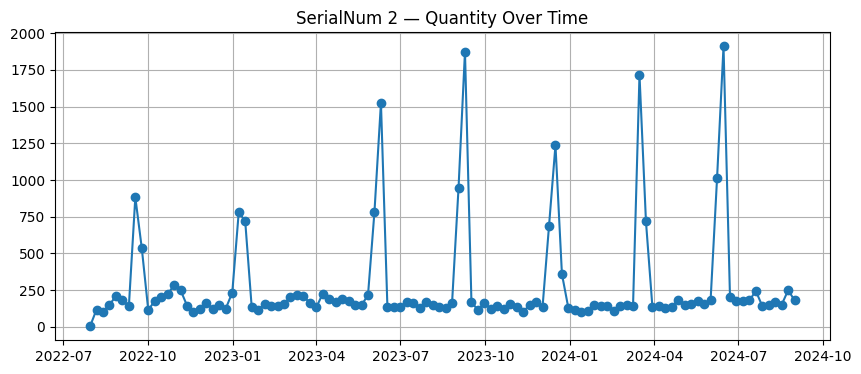

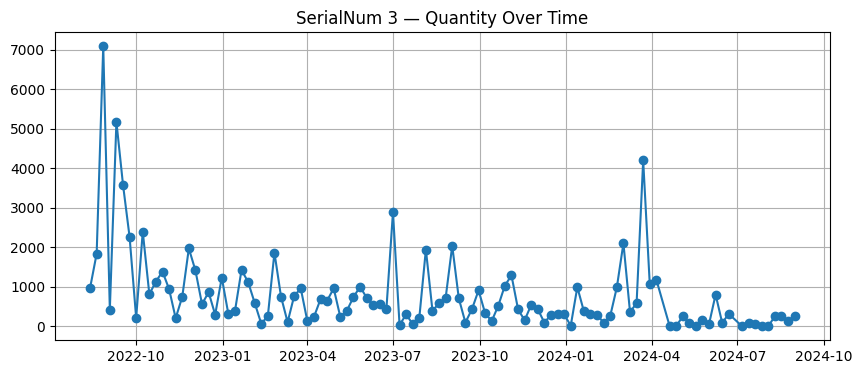

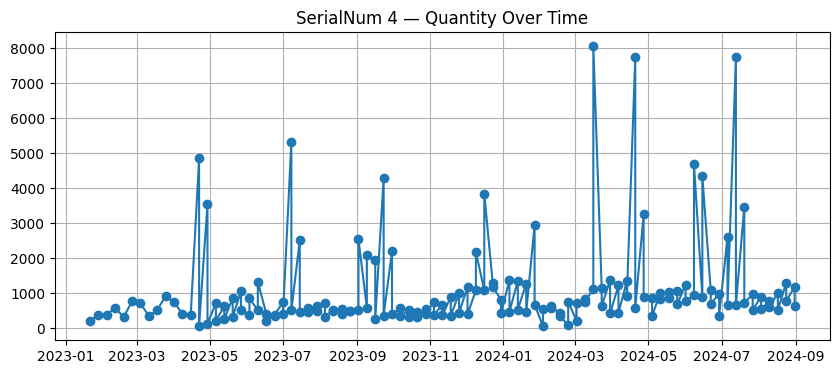

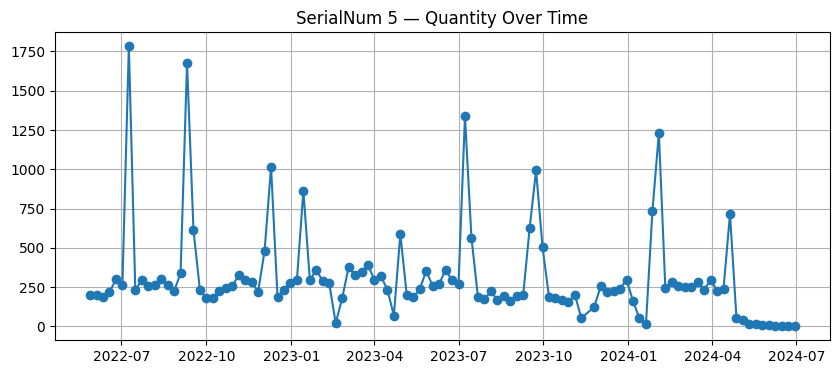

In [ ]:
serial_nums = df['SerialNum'].unique()
for s in serial_nums:
    plt.figure(figsize=(10, 4))
    sub = df[df['SerialNum'] == s]
    plt.plot(sub['weekend_date'], sub['quantity'], marker='o')
    plt.title(f"SerialNum {s} — Quantity Over Time")
    plt.grid(True)


### Seasonality for some serial number can be seen here


Text(0, 0.5, 'Frequency')

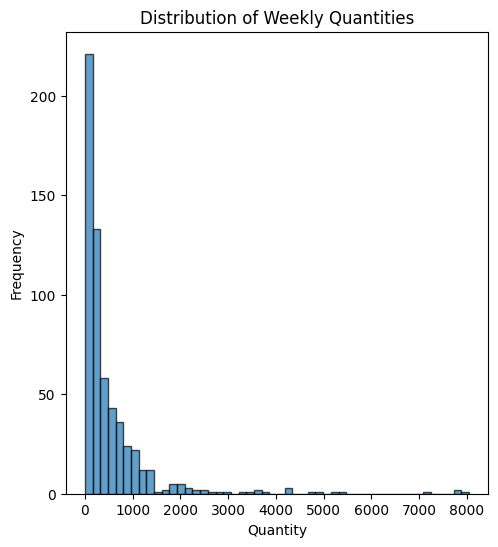

In [ ]:
# Distribution of quantities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['quantity'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Weekly Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

### right skew as seen before
### log transformation will be needed

In [ ]:

# Seasonal patterns analysis
df['year'] = df['weekend_date'].dt.year

df['month'] = df['weekend_date'].dt.month
df['week_of_year'] = df['weekend_date'].dt.isocalendar().week

In [ ]:
# monthly aggregation
monthly_sales = df.groupby(['year', 'month'])['quantity'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1)) # useful for plotting , for the sake of date i gave 1

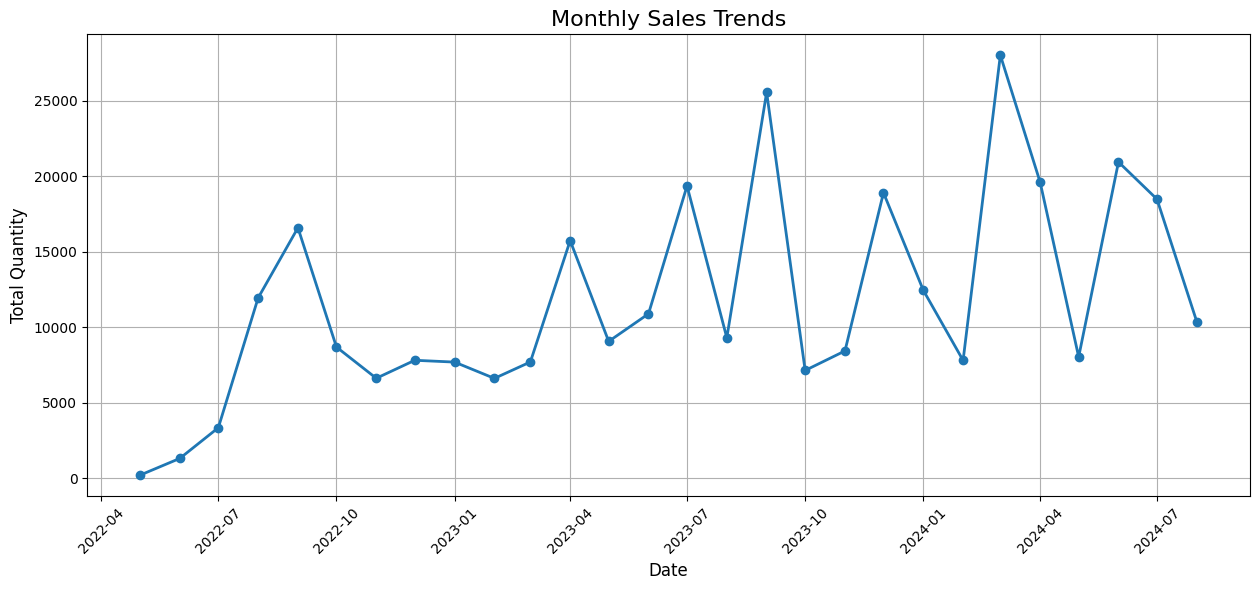

In [ ]:
plt.figure(figsize=(fig_width, 6))
plt.plot(monthly_sales['date'], monthly_sales['quantity'], marker='o', linewidth=2)
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# seasonal decomposition for each SerialNum

first_serial = df['SerialNum'].iloc[0]
serial_data = df[df['SerialNum'] == first_serial].copy()
serial_data = serial_data.set_index('weekend_date')['quantity']

In [ ]:
# ensure no missing dates
serial_data = serial_data.asfreq('W-SAT')

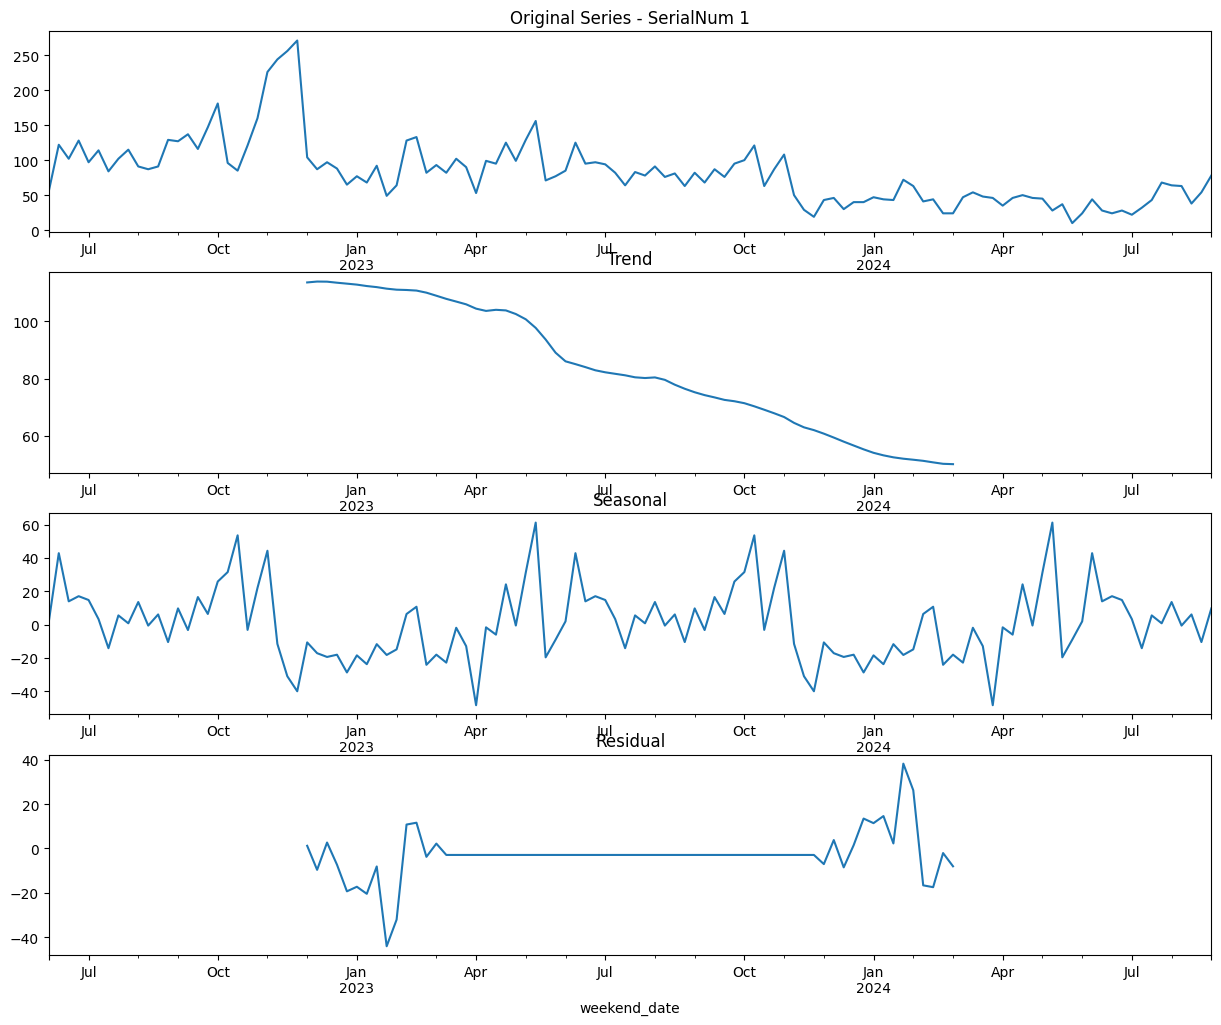

In [ ]:
if len(serial_data) > 24:  # 2 years for seasonal decomposition
    decomposition = seasonal_decompose(serial_data, model='additive', period=52)

    fig, axes = plt.subplots(4, 1, figsize=(fig_width, 12))
    decomposition.observed.plot(ax=axes[0], title=f'Original Series - SerialNum {first_serial}')
    decomposition.trend.plot(ax=axes[1], title='Trend')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition.resid.plot(ax=axes[3], title='Residual')
    plt.show()

In [ ]:
# outlier detection
# iqr
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = df[(df['quantity'] < lower_bound) | (df['quantity'] > upper_bound)]
print(f"no. of outliers detected: {len(outliers)}")
print(f"% of outliers: {len(outliers)/len(df)*100:.2f}%")

no. of outliers detected: 43
% of outliers: 7.17%


In [ ]:
outliers['quantity'].describe()

,quantity
count,43.000000
mean,3153.906977
std,1826.893067
min,1382.000000
25%,1893.000000
50%,2398.000000
75%,4018.500000
max,8051.000000


In [ ]:
# correlation

# creating time-based features for correlation analysis
df['day_of_year'] = df['weekend_date'].dt.dayofyear
df['quarter'] = df['weekend_date'].dt.quarter



In [ ]:
[col for col in df.columns if df[col].dtype !="O"]

In [ ]:
df

,weekend_date,channel,brand,category,sub_category,SerialNum,quantity,year,month,week_of_year,day_of_year,quarter
0,2022-06-04,Channel1,B1,Cat2,Sub-Cat2,1,56,2022,6,22,155,2
1,2022-06-11,Channel1,B1,Cat2,Sub-Cat2,1,122,2022,6,23,162,2
2,2022-06-18,Channel1,B1,Cat2,Sub-Cat2,1,102,2022,6,24,169,2
3,2022-06-25,Channel1,B1,Cat2,Sub-Cat2,1,128,2022,6,25,176,2
4,2022-07-02,Channel1,B1,Cat2,Sub-Cat2,1,97,2022,7,26,183,3
...,...,...,...,...,...,...,...,...,...,...,...,...
554,2024-06-01,Channel2,B1,Cat1,Sub-Cat1,5,8,2024,6,22,153,2
558,2024-06-08,Channel2,B1,Cat1,Sub-Cat1,5,4,2024,6,23,160,2
562,2024-06-15,Channel2,B1,Cat1,Sub-Cat1,5,1,2024,6,24,167,2
566,2024-06-22,Channel2,B1,Cat1,Sub-Cat1,5,1,2024,6,25,174,2


In [ ]:
# Correlation matrix for numerical features
numerical_features = ['quantity', 'year', 'month', 'week_of_year', 'day_of_year', 'quarter']
correlation_matrix = df[numerical_features].corr()



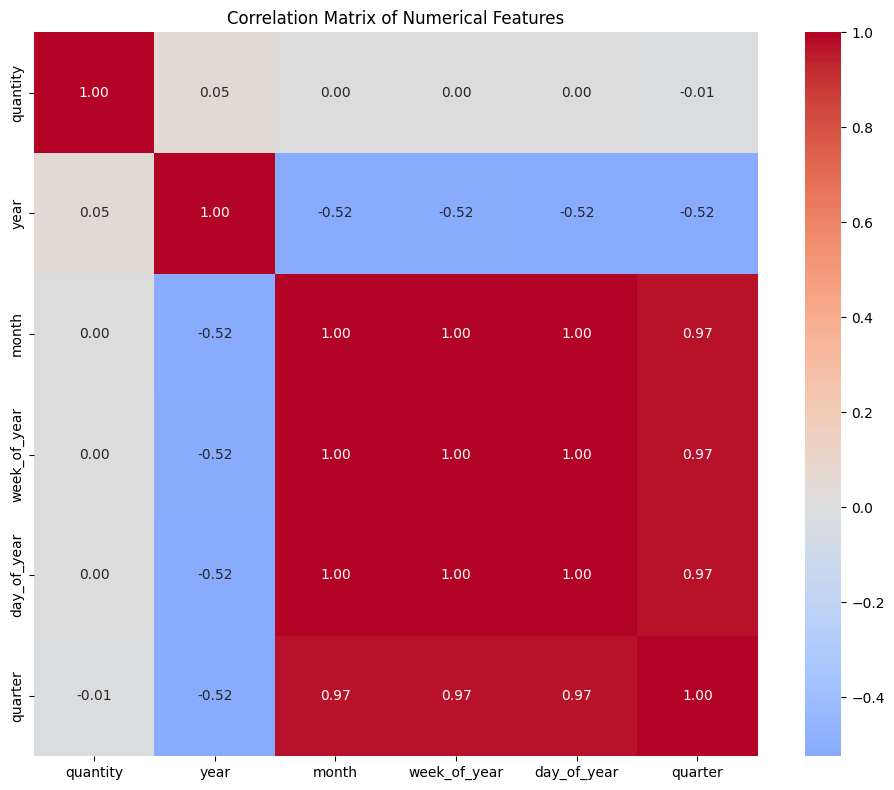

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


quantity shows minimal correlation with all time-based features, suggesting no strong linear relationship with calendar components like month or year.



In [ ]:
validation_start = pd.to_datetime('2024-06-01')
validation_end = pd.to_datetime('2024-08-31')
validation_data = df[(df['weekend_date'] >= validation_start) &
                    (df['weekend_date'] <= validation_end)]

if len(validation_data) > 0:
    print(f"• Validation period data available: {len(validation_data)} records")
    print(f"• Validation period: {validation_data['weekend_date'].min().strftime('%Y-%m-%d')} to {validation_data['weekend_date'].max().strftime('%Y-%m-%d')}")
else:
    print("• No validation period data found (Jun-Jul-Aug 2024)")

• Validation period data available: 74 records
• Validation period: 2024-06-01 to 2024-08-31


In [ ]:
# Seasonality insights
monthly_avg = df.groupby('month')['quantity'].mean()
peak_month = monthly_avg.idxmax()
low_month = monthly_avg.idxmin()
print(f"• Peak sales month: {peak_month} (avg: {monthly_avg[peak_month]:.2f})")
print(f"• Lowest sales month: {low_month} (avg: {monthly_avg[low_month]:.2f})")


• Peak sales month: 9 (avg: 915.67)
• Lowest sales month: 2 (avg: 327.43)
